# [E-06] Movie Review Sentiment Analysis 
## 영화리뷰 텍스트 감성분석하기
### 학습 목표
* 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
* RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
* 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
* IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.


### 목차
#### 1. 들어가며    
  1-1. 한국어 텍스트 감정 분석         
  1-2. 딥러닝을 이용한 텍스트 감성분석    
  1-3. 감성 분석(Sentiment Analysis)    
  1-4. 감성 분석 접근법 2가지    
  1-5. 감성 표현의 3단계     
  1-6. 워드 임베딩(word embedding) 기법      
  1-7. KoNLPy: 코엔엘파이     
#### 2. 데이터 준비 및 로드    
  2-1. 데이터 준비   
  2-2. 데이터로더 구성      
  2-3. 모델 구성을 위한 데이터 분석 및 가공     
#### 3. 모델 구성 및 훈련     
  3-1. Validation set 구성     
  3-2. 레이어 분석 및 모델 훈련     
  3-3. 학습된 Embedding 레이어 분석     
  3-4. 한국어 Word2Vec 임베딩 활용하여 성능 개선     
#### 4. 회고
  4-1. 이번 프로젝트에서 어려웠던 점     
  4-2. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점      
  4-3. 궁금한 사항       
  4-4. 참고사이트     

### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 다양한 방법으로 Text Classification 태스크를 성공적으로 구현하였다.|3가지 이상의 모델이 성공적으로 시도됨|
|2. gensim을 활용하여 자체학습된 혹은 사전학습된 임베딩 레이어를 분석하였다.|gensim의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습 임베딩을 적절히 분석함|
|3. 한국어 Word2Vec을 활용하여 가시적인 성능향상을 달성했다.|네이버 영화리뷰 데이터 감성분석 정확도를 85% 이상 달성함|   
<br/>

----

## 1. 들어가며
### 1-1. 한국어 텍스트 감정 분석     
활용할 데이터셋   
네이버 영화의 댓글을 모아 구성한 Naver Sentiment Movie Corpus   
https://github.com/e9t/nsmc   

### 1-2. 딥러닝을 이용한 텍스트 감성분석**
* 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?
* 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?
* 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?
* 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

### 1-3. 감성 분석(Sentiment Analysis)   
* 텍스트에 나타난 주관적 요소인 긍정적 감정과 부정적 감정을 판별해 이를 수치나 도식, 등급 등으로 정량화하는 작업
* 단순히 긍정과 부정을 판별만 하는 것이 아니라 대상이 되는 개체나 속성을 추출하고, 감성을 표현하는 이들의 감정(Emotion), 감성(Sentiment), 태도(Attitude), 입장(Stance) 등을 분석
* 글에 내재돼 있는 사람들의 주관적 태도나 감성을 추출해내는 분석 기법
* 감성 분석에서 가장 중요한 요소는 '감성 표현'이지만 감성 표현은 반드시 특정 대상(Target)을 전제하고 있다는 점에서 '대상'과 '감성 표현'은 의견(Opinion)을 구성하는 가장 기본적인 요소가 됨
* 감성 표현의 대상은 보통 개체(Entity)라고 부름

### 1-4. 감성 분석 접근법 2가지   
* 기계학습 기반 접근법
* 감성사전 기반 접근법
  한계점
  * 1.분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 가능성에 대응하기 어렵다.
  * 2.단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다.

### 1-5. 감성 표현의 3단계   
* 데이터 수집
  소셜미디어와 같은 웹사이트 매체에서 정보를 수집
* 주관성 탐지
  수집된 정보에서 텍스트 작성자의 주관이 드러난 부분만을 걸러내는 과정
* 분류
  주관성의 극성을 미리 정의된 극성(긍정, 중립, 부정 등) 또는 정도(1, 2, 3, 4, 5) 등으로 분류함
  
### 1-6. 워드 임베딩(word embedding) 기법   
* 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법
* 단어의 특성을 저차원 벡터값으로 표현할 수 있는 기법

### 1-7. KoNLPy: 코엔엘파이
* 한국어 자연어 처리를 위한 파이썬 패키지
* KoNLPy를 통해 사용할 수 있는 형태소 분석기
  * Okt(Open Korea Text)
  * 메캅(Mecab)
  * 코모란(Komoran)
  * 한나눔(Hannanum)
  * 꼬꼬마(Kkma)

## 2. 데이터 준비 및 로드 

### 2-1. 데이터 준비

In [1]:
# 필요한 패키지 및 모듈 import
import os
import numpy as np
import pandas as pd
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.initializers import Constant
import gensim
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

#### 데이터 로드하기

In [2]:
train_data = pd.read_table('~/aiffel/Exploration/E_06/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/Exploration/E_06/sentiment_classification/data/ratings_test.txt')

print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(train_data), len(test_data)))
train_data.head()

훈련 샘플 개수: 150000, 테스트 개수: 50000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


* 우리가 불러온 데이터는 id, document, label 총 3개의 열로 구성되어 있습니다.
* 이 중, 감성분류를 하는데 도움이 되는 document와 해당 리뷰가 긍정(1)인지 부정(0)인지 나타내는 label 두 개의 열을 데이터로 사용할 예정입니다.


### 2-2. 데이터로더 구성

#### 나만의 data_loader 만들기

Mecab  
stopwords   
drop_duplicates   
dropna  

#### 토큰화 (Tokenize)
* 토큰화 과정에서 불용어 제거할 예정입니다.
* 불용어는 **정의하기 나름**인데, 한국어의 조사, 접속사 등의 보편적인 불용어를 기본으로 사용할 수 있습니다.
* 이후 데이터를 지속적으로 검토하면서 계속해서 추가하는 경우도 있습니다.


In [3]:
tokenizer = Mecab()

In [4]:
# 불용어
stopwords = ['의','가','이','은','들','는', 
             '좀','잘','걍','과','도','를', 
             '으로','자','에','와','한','하다']

In [5]:
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')  
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 


### 2-3. 모델 구성을 위한 데이터 분석 및 가공

#### 단어의 길이 분포 확인하기
* 긍정 리뷰에는 어떤 단어들이 많이 등장하고, 부정 리뷰에는 어떤 단어들이 많이 등장하는 지 두 가지 경우에 대해서 각 단어의빈도수를 계산해보겠습니다.
* 각 레이블에 따라서 별도로 단어들의 리스트를 저장해줍니다.

In [6]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [7]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [8]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있다.
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word[0] = "<PAD>"
index_to_word[1] = "<BOS>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됨

<BOS>


In [9]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092


#### 적절한 최대 문장 길이 지정

In [10]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))


pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


#### keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [11]:

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)
    
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 41)


## 3. 모델 구성 및 훈련

### 3-1. Validation set 구성


In [12]:
# validation set 30000건 분리
X_val = X_train[:30000]   
y_val = y_train[:30000]

# validation set을 제외한 나머지
partial_X_train = X_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


### 3-2. 레이어 분석 및 모델 훈련

#### LSTM 레이어

In [13]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(32))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 16로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 166,545
Trainable params: 166,545
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs = 5 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 5s 8ms/step - loss: 0.4701 - accuracy: 0.7804 - val_loss: 0.3527 - val_accuracy: 0.8469
Epoch 2/5
227/227 [==============================] - 1s 6ms/step - loss: 0.3368 - accuracy: 0.8569 - val_loss: 0.3574 - val_accuracy: 0.8438
Epoch 3/5
227/227 [==============================] - 1s 6ms/step - loss: 0.3156 - accuracy: 0.8673 - val_loss: 0.3460 - val_accuracy: 0.8508
Epoch 4/5
227/227 [==============================] - 1s 6ms/step - loss: 0.3032 - accuracy: 0.8740 - val_loss: 0.3527 - val_accuracy: 0.8510
Epoch 5/5
227/227 [==============================] - 1s 6ms/step - loss: 0.2906 - accuracy: 0.8797 - val_loss: 0.3523 - val_accuracy: 0.8508


* Epoch 10으로 했을 때 과적합 발생하여 5로 줄임

In [15]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3639 - accuracy: 0.8461
[0.3639436662197113, 0.8460850119590759]


### 시각화

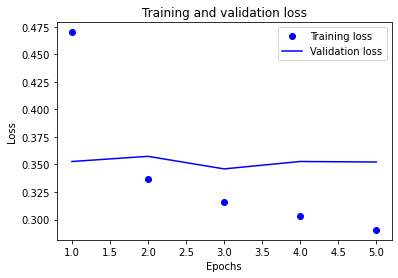

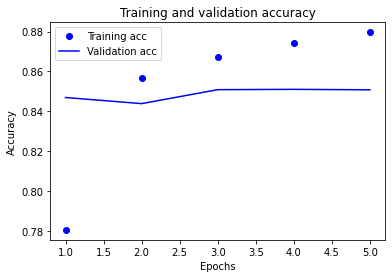

In [16]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### GlobalMaxPooling1D 레이어

In [17]:
vocab_size = 10000 
word_vector_dim = 16  

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 1s 4ms/step - loss: 0.6132 - accuracy: 0.6900 - val_loss: 0.4930 - val_accuracy: 0.8150
Epoch 2/5
227/227 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8383 - val_loss: 0.3662 - val_accuracy: 0.8414
Epoch 3/5
227/227 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8631 - val_loss: 0.3510 - val_accuracy: 0.8468
Epoch 4/5
227/227 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.8785 - val_loss: 0.3512 - val_accuracy: 0.8471
Epoch 5/5
227/227 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.8894 - val_loss: 0.3567 - val_accuracy: 0.8480


In [19]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3666 - accuracy: 0.8433
[0.36659255623817444, 0.8433183431625366]


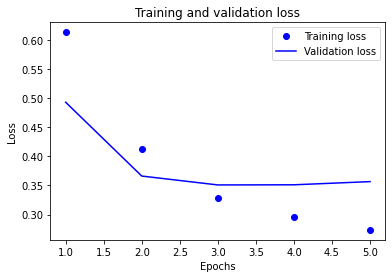

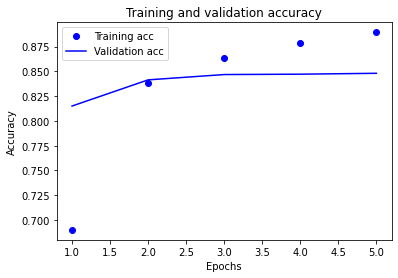

In [20]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3-3. 학습된 Embedding 레이어 분석

In [21]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [22]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/Exploration/E_06/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

### 3-4. 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [23]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['남자']
vector

array([-0.02009594, -0.01292825, -0.03465129, -0.0466814 ,  0.02029727,
       -0.06207271, -0.12090296, -0.06527136, -0.05565178, -0.0882879 ,
       -0.11351792, -0.09180216, -0.06022427, -0.078814  , -0.03980063,
       -0.09749314], dtype=float32)

In [24]:
word_vectors.similar_by_word("사랑")

[('내세운', 0.836593747138977),
 ('계절', 0.8274362087249756),
 ('외국인', 0.8270691633224487),
 ('첩', 0.8227169513702393),
 ('이재은', 0.8191648721694946),
 ('감각', 0.8109968900680542),
 ('수레', 0.8064194917678833),
 ('현실', 0.8056994676589966),
 ('보여서', 0.8046314716339111),
 ('87', 0.8027013540267944)]

In [25]:
word2vec_path = os.getenv('HOME')+'/aiffel/Exploration/E_06/sentiment_classification/data/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec["사랑"]
vector.shape


/tmp/ipykernel_495/2302235442.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec["사랑"]


(200,)

In [26]:
word2vec.similar_by_word("사랑")

/tmp/ipykernel_495/1360476464.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("사랑")


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [27]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_495/1730871920.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_495/1730871920.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [28]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 35, 16)            22416     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/5
227/227 [==============================] - 4s 8ms/step - loss: 0.5943 - accuracy: 0.6528 - val_loss: 0.4527 - val_accuracy: 0.7886
Epoch 2/5
227/227 [==============================] - 1s 6ms/step - loss: 0.4005 - accuracy: 0.8218 - val_loss: 0.3799 - val_accuracy: 0.8295
Epoch 3/5
227/227 [==============================] - 1s 6ms/step - loss: 0.3361 - accuracy: 0.8568 - val_loss: 0.3667 - val_accuracy: 0.8383
Epoch 4/5
227/227 [==============================] - 1s 6ms/step - loss: 0.2982 - accuracy: 0.8769 - val_loss: 0.3649 - val_accuracy: 0.8413
Epoch 5/5
227/227 [==============================] - 1s 6ms/step - loss: 0.2723 - accuracy: 0.8891 - val_loss: 0.3664 - val_accuracy: 0.8438


In [30]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3778 - accuracy: 0.8402
[0.377759724855423, 0.8402262330055237]


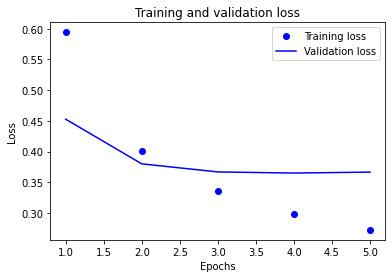

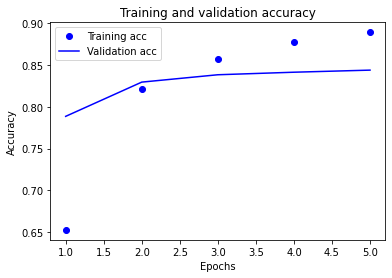

In [31]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 4. 회고

### 4-1. 이번 프로젝트에서 어려웠던 점
* 전부 다 어려워서 처음부터 끝까지 헤맸습니다. 아직도 어떻게 된건지 전혀 이해가 가지 않습니다. 
<br/>
<br/>

### 4-2. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점   
* Future Warning
  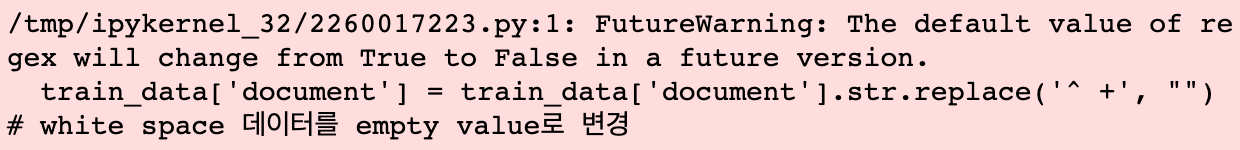
  
<br/>
<br/>


### 4-3. 궁금한 사항
* 데이터 정제의 순서. 토큰화 전에 하는게 좋을까요, 토큰화 후에 하는게 좋을까요?

### 4-4. 참고사이트

* 딥러닝을 이용한 자연어 처리 입문   
https://wikidocs.net/44249   
https://wikidocs.net/94600


* Hangul Compatibility Jamo   
https://www.unicode.org/charts/PDF/U3130.pdf  


* Hangul Syllables   
https://www.unicode.org/charts/PDF/UAC00.pdf  


* Error
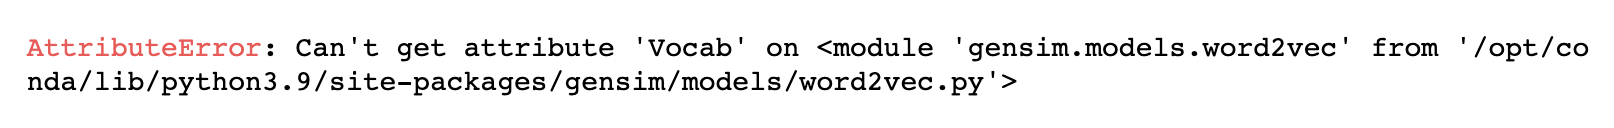
https://iambeginnerdeveloper.tistory.com/41
